# Pottery Classification Model

#import libraries

In [4]:
import os
import cv2
import numpy as np
from keras import backend as k
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
import scipy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from pathlib import Path

#Creating the dataset, resizing, applying greyscale filter


In [7]:
working_directory = Path().absolute()
print(working_directory)

/home/uddi/Desktop/potery/Pottery-Classification


In [8]:
dataDir_Tr = working_directory / "Dataset/TrainDS"
dataDir_Ts = working_directory / "Dataset/TestDS"
CATEGORIES = ["clay cups","clay doll","clay flower pot","kalah","saaki"]
IMG_SIZE = 50

In [9]:

training_data = []
testing_data = []

def create_training_data(dataDir,X):
    for category in CATEGORIES:
        path = os.path.join(dataDir, category)  #path for the image
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  #reading the image in grayscale 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  ##resizing the image
                X.append([new_array, class_num])  #Appending the images into an array
            except Exception as e:
                pass

create_training_data(dataDir_Tr,training_data)
create_training_data(dataDir_Ts,testing_data)

# Convert To Numpy Array and Normalizing The Array

In [10]:
#for training_data array
X = []
y = []

for featuresTrain, labelTrain in training_data: #tagging the images
    X.append(featuresTrain)
    y.append(labelTrain)

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)  #reshaping the array

#converting the array to numpy array
X_tr = np.asarray(X)  
X_tr = X_tr.astype('float32')
Y_tr = np.asarray(y)
X_tr /= 255  #normalizing the array to range between 0 and 1


In [11]:
#for testing_data array
P = []
q = []

for featuresTest, labelTest in testing_data:  #tagging the images
    P.append(featuresTest)
    q.append(labelTest)
    
P = np.array(P).reshape(-1,IMG_SIZE, IMG_SIZE, 1)  #reshaping the array

#converting the array to numpy array
P_ts = np.asarray(P)
Q_ts = np.asarray(q)
P_ts = P_ts.astype('float32')
P_ts /= 255  #normalizing the array to range between 0 and 1


#Creating Log Report

In [15]:
#path for log files
NAME = "potteryClassification-cnn-{}"
logdir="logs/"+ datetime.now().strftime("%Y-%m-%d[%Hh %Mm %Ss]")+NAME
tb = TensorBoard(log_dir= logdir)

#Creating CNN Model

In [17]:
model = Sequential()

model.add(Conv2D(32, (5, 5), strides = (1, 1), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides = (1,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(5,activation='softmax'))

#Compile And Run 

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [19]:
Epoch_no = 80
Model = model.fit(X_tr,Y_tr,epochs = Epoch_no,validation_split=0.1,batch_size=32,validation_data=(P_ts,Q_ts),callbacks=[[tb]])
score = model.evaluate(X_tr,Y_tr,verbose=0)


Epoch 1/80
55/55 [==============================] - 4s 58ms/step - loss: 1.4994 - accuracy: 0.3736 - val_loss: 1.5952 - val_accuracy: 0.2617
Epoch 2/80
55/55 [==============================] - 2s 45ms/step - loss: 1.4354 - accuracy: 0.4178 - val_loss: 1.5349 - val_accuracy: 0.4228
Epoch 3/80
55/55 [==============================] - 3s 46ms/step - loss: 1.3529 - accuracy: 0.4580 - val_loss: 1.4668 - val_accuracy: 0.3691
Epoch 4/80
55/55 [==============================] - 2s 44ms/step - loss: 1.2993 - accuracy: 0.4839 - val_loss: 1.4402 - val_accuracy: 0.3557
Epoch 5/80
55/55 [==============================] - 2s 43ms/step - loss: 1.2155 - accuracy: 0.5310 - val_loss: 1.3945 - val_accuracy: 0.3758
Epoch 6/80
55/55 [==============================] - 2s 43ms/step - loss: 1.1284 - accuracy: 0.5845 - val_loss: 1.3639 - val_accuracy: 0.3826
Epoch 7/80
55/55 [==============================] - 2s 43ms/step - loss: 1.0918 - accuracy: 0.5902 - val_loss: 1.3976 - val_accuracy: 0.3826
Epoch 8/80
55

Epoch 59/80
55/55 [==============================] - 2s 43ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.6458 - val_accuracy: 0.9128
Epoch 60/80
55/55 [==============================] - 2s 43ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.6537 - val_accuracy: 0.8993
Epoch 61/80
55/55 [==============================] - 2s 43ms/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 0.7157 - val_accuracy: 0.8859
Epoch 62/80
55/55 [==============================] - 2s 43ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.6831 - val_accuracy: 0.8993
Epoch 63/80
55/55 [==============================] - 2s 43ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.7931 - val_accuracy: 0.9060
Epoch 64/80
55/55 [==============================] - 2s 44ms/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.6746 - val_accuracy: 0.9262
Epoch 65/80
55/55 [==============================] - 2s 44ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.7142 - val_accuracy: 0.9060
Epoch 

Test set loss:  0.8440622687339783
Test set accuracy:  75.74712634086609


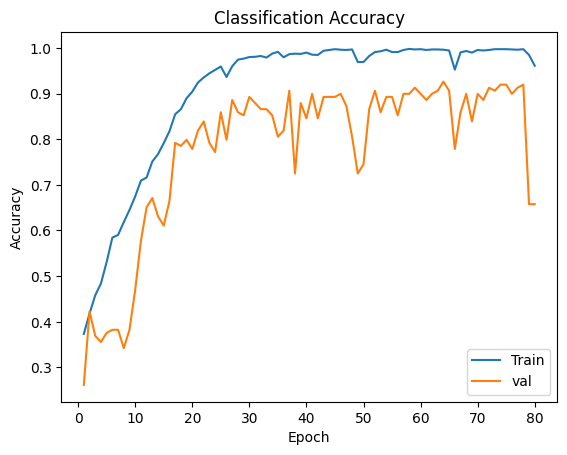

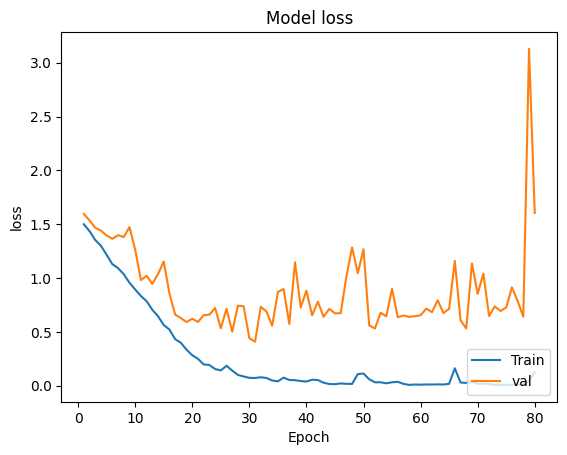

In [20]:
print("Test set loss: ", score[0])
print("Test set accuracy: ", score[1]*100)

epoch_range = range(1, Epoch_no+1)
plt.plot(epoch_range,Model.history['accuracy'])
plt.plot(epoch_range,Model.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'lower right')
plt.show()

plt.plot(epoch_range,Model.history['loss'])
plt.plot(epoch_range,Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'lower right')
plt.show()

In [21]:
print("%s:  %2f%%"%(model.metrics_names[1], score[1]*100))

accuracy:  75.747126%


#Saving The Model

In [22]:
model.save(working_directory / "trainedModel/model.h5")
model.save_weights(working_directory / "trainedModel/Weights.h5")